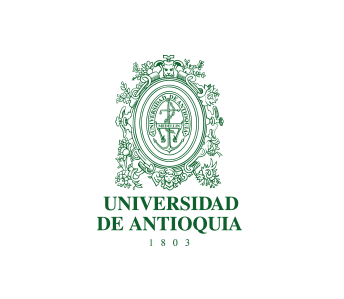

#**Practica 6: DISEÑO DE FILTROS DIGITALES**


Estudiantes:
- Juan Camilo Carvajal Sierra - 1010124738
- Ana María Uribe Betancur - 1000537653
- Duvan Vega Cardona - 1003896233

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal
from scipy.signal import lfilter, filtfilt, iirfilter, freqz, welch, firwin



---

## 4.1. Creación de la señal

---

Secuencia sinusoidal $𝑥_𝑒(𝑛)$, con 0 ≤ 𝑛 ≤ 1000, $𝐹_0$ = 0,01 𝐻𝑧 y $𝐹_𝑠$ = 25 𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética $𝑥_𝑒(𝑛)$ a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

\begin{equation}
y_𝑒(𝑛) = 𝛼 𝑥_𝑒(𝑛−𝐷)+𝑤(𝑛)
\end{equation}

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.


*   Genere las secuencias ficticias $𝑥_𝑒(𝑛)$ y $𝑦_𝑒(𝑛)$, implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza $𝜎^{2} = 0,01$, establezca 𝛼 = 0,8 y un retraso 𝐷 = 15 muestras. Grafique ambas señales.  
Nota: Para generar el ruido gaussiano use la función de numpy:
np.random.normal.



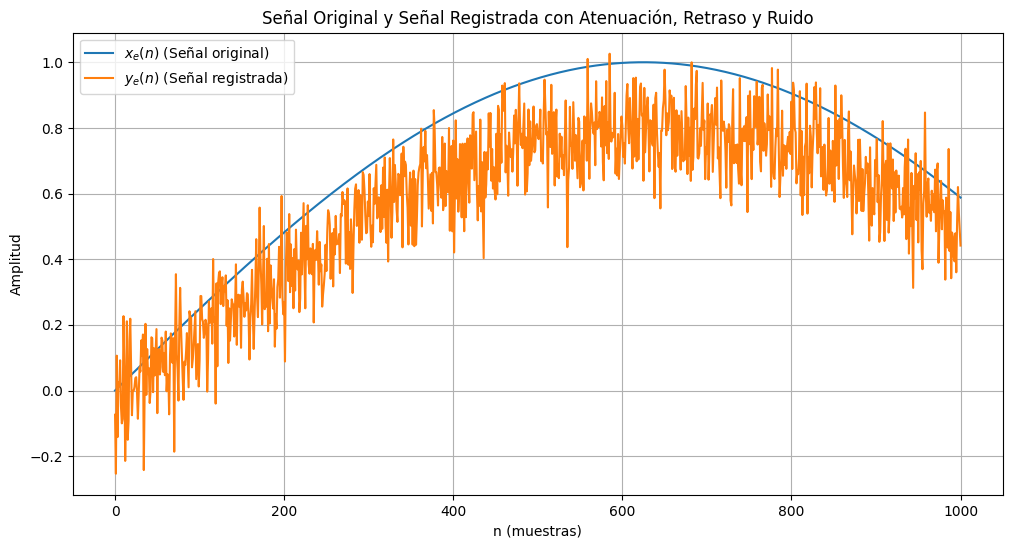

In [ ]:
# Parámetros de la señal
Fs = 25  # Frecuencia de muestreo
F0 = 0.01  # Frecuencia de la señal sinusoidal
n = np.arange(0, 1001)
alpha = 0.8
D = 15
sigma_squared = 0.01  # Varianza del ruido gaussiano

# Señal sinusoidal original x_e(n) (señal biológica hipotética)
xe_n = np.sin(2 * np.pi * F0 * n / Fs)

# Ruido gaussiano w(n)
mu = 0  # Media del ruido
sigma = np.sqrt(sigma_squared)  # Desviación estándar del ruido
w_n = np.random.normal(mu, sigma, len(n))

# Señal registrada y_e(n) con atenuación, retraso y ruido
ye_n = alpha * np.sin(2 * np.pi * F0 * (n - D) / Fs) + w_n

# Graficar ambas señales
plt.figure(figsize=(12, 6))
plt.plot(n, xe_n, label='$x_e(n)$ (Señal original)')
plt.plot(n, ye_n, label='$y_e(n)$ (Señal registrada)')
plt.title('Señal Original y Señal Registrada con Atenuación, Retraso y Ruido')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


---

## 4.2. Diseño de un filtro

---
La función *firwin* permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son *N: Orden del filtro* y *$𝑊_𝑛$: Frecuencia de corte*.
Para filtros digitales $𝑊_𝑛$ está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. $𝑊_𝑛$ es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.


* Diseñe un filtro FIR pasa bajas para la señal $𝑦_𝑒(𝑛)$, con una frecuencia de corte de 1.25 muestras/s y orden 30.
* ¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)



In [ ]:
# Parámetros comunes
orden = 30
Fs = 25
f_nyq = Fs / 2 # Frecuencia de Nyquist

# Frecuencias de corte normalizadas
fc_lp = 1.25 / f_nyq     # Frecuencia de corte normalizada para pasa bajas (0.1)
fc_hp = 7.5 / f_nyq       # Frecuencia de corte normalizada para pasa altas (0.6)
fc_bp = [1.25 / f_nyq, 7.5 / f_nyq]  # [0.1, 0.6]

# Filtro FIR pasa bajas
fir_lp = signal.firwin(numtaps=orden + 1, cutoff=fc_lp, window='hamming', pass_zero=True)

# Filtro FIR pasa altas
fir_hp = signal.firwin(numtaps=orden + 1, cutoff=fc_hp, window='hamming', pass_zero=False)

# Filtro FIR pasa banda
fir_bp = signal.firwin(numtaps=orden + 1, cutoff=fc_bp, window='hamming', pass_zero=False)


print("Coeficientes del filtro FIR pasa bajas (b_pb):")
display(fir_lp)
print("\nCoeficientes del filtro FIR pasa altas (b_pa):")
display(fir_hp)
print("\nCoeficientes del filtro FIR pasa banda (b_banda):")
display(fir_bp)

Coeficientes del filtro FIR pasa bajas (b_pb):


array([-1.73272640e-03, -1.98748297e-03, -2.42153251e-03, -2.67113413e-03,
       -2.11925400e-03,  1.23339962e-18,  4.43805688e-03,  1.17422605e-02,
        2.20815504e-02,  3.51289228e-02,  5.00324748e-02,  6.54894059e-02,
        7.99158416e-02,  9.16844398e-02,  9.93861724e-02,  1.02066010e-01,
        9.93861724e-02,  9.16844398e-02,  7.99158416e-02,  6.54894059e-02,
        5.00324748e-02,  3.51289228e-02,  2.20815504e-02,  1.17422605e-02,
        4.43805688e-03,  1.23339962e-18, -2.11925400e-03, -2.67113413e-03,
       -2.42153251e-03, -1.98748297e-03, -1.73272640e-03])


Coeficientes del filtro FIR pasa altas (b_pa):


array([ 7.29252811e-18, -1.95095488e-03,  1.72701120e-03,  2.62204116e-03,
       -6.40251760e-03, -4.84292351e-18,  1.34078960e-02, -1.15264487e-02,
       -1.57483266e-02,  3.44832858e-02,  1.20291971e-17, -6.42857714e-02,
        5.69951271e-02,  8.99993648e-02, -3.00257411e-01,  4.00760525e-01,
       -3.00257411e-01,  8.99993648e-02,  5.69951271e-02, -6.42857714e-02,
        1.20291971e-17,  3.44832858e-02, -1.57483266e-02, -1.15264487e-02,
        1.34078960e-02, -4.84292351e-18, -6.40251760e-03,  2.62204116e-03,
        1.72701120e-03, -1.95095488e-03,  7.29252811e-18])


Coeficientes del filtro FIR pasa banda (b_banda):


array([ 1.70361250e-03,  3.90817712e-03,  6.51059865e-04,  1.63631623e-17,
        8.49644702e-03, -8.48872911e-18, -1.77929192e-02,  5.13801322e-18,
       -5.93690613e-03, -6.90773477e-02, -4.91918109e-02, -1.18068938e-17,
       -1.35659741e-01, -1.80287849e-01,  2.03023443e-01,  5.01755297e-01,
        2.03023443e-01, -1.80287849e-01, -1.35659741e-01, -1.18068938e-17,
       -4.91918109e-02, -6.90773477e-02, -5.93690613e-03,  5.13801322e-18,
       -1.77929192e-02, -8.48872911e-18,  8.49644702e-03,  1.63631623e-17,
        6.51059865e-04,  3.90817712e-03,  1.70361250e-03])

La función iirfilter permite diseñar un filtro IIR.  
* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.  
Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

#### **¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas?**

Para utilizar la función firwin, tenemos los siguientes argumentos:

1. Parámetro `cutoff`: Define las frecuencias de corte normalizadas (0 a 1, donde 1 es la frecuencia de Nyquist)
- Pasa bajas: cutoff = fc_lp (0.1)
- Pasa altas: cutoff = fc_hp (0.6)
- Pasa banda: cutoff = fc_bp (Para filtros pasa banda, se necesitan dos frecuencias de corte que definen los límites inferior y superior de la banda de paso [0.1, 0.6])

2. Parámetro `pass_zero`: Determina si se permite el paso de la componente DC (frecuencia 0 Hz)

- Pasa bajas: pass_zero = True (permite paso de frecuencia cero/DC)
- Pasa altas: pass_zero = False (bloquea frecuencia cero/DC)
- Pasa banda: pass_zero = False (bloquea frecuencia cero/DC)


En resumen:

| Tipo de Filtro | cutoff             | pass_zero |
|----------------|--------------------|------------|
| Pasa bajas     | Valor único (fc)   | True       |
| Pasa altas     | Valor único (fc)   | False      |
| Pasa banda     | Lista [fc_bajo, fc_alto]| False |



#### Referencias:
- [1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

In [ ]:
# Mismos parametros que el filtro FIR

# Diseño del filtro IIR pasa bajas
# Para iirfilter, se devuelven el numerador (b) y el denominador (a) del filtro
b_iir_pb, a_iir_pb = iirfilter(orden, Wn=fc_lp, btype='lowpass', analog=False, ftype='butter')

# Diseño del filtro IIR pasa altas
b_iir_pa, a_iir_pa = iirfilter(orden, Wn=fc_hp, btype='highpass', analog=False, ftype='butter')

# Diseño del filtro IIR pasa banda
b_iir_banda, a_iir_banda = iirfilter(orden, Wn=fc_bp, btype='bandpass', analog=False, ftype='butter')

print("Coeficientes del filtro IIR pasa bajas:")
print("Numerador (b_iir_pb):")
display(b_iir_pb)
print("\nDenominador (a_iir_pb):")
display(a_iir_pb)

print("\nCoeficientes del filtro IIR pasa altas:")
print("Numerador (b_iir_pa):")
display(b_iir_pa)
print("\nDenominador (a_iir_pa):")
display(a_iir_pa)

print("\nCoeficientes del filtro IIR pasa banda:")
print("Numerador (b_iir_banda):")
display(b_iir_banda)
print("\nDenominador (a_iir_banda):")
display(a_iir_banda)

Coeficientes del filtro IIR pasa bajas:
Numerador (b_iir_pb):


array([4.79416163e-26, 1.43824849e-24, 2.08546031e-23, 1.94642962e-22,
       1.31384000e-21, 6.83196798e-21, 2.84665332e-20, 9.75995425e-20,
       2.80598685e-19, 6.85907896e-19, 1.44040658e-18, 2.61892106e-18,
       4.14662501e-18, 5.74148078e-18, 6.97179809e-18, 7.43658463e-18,
       6.97179809e-18, 5.74148078e-18, 4.14662501e-18, 2.61892106e-18,
       1.44040658e-18, 6.85907896e-19, 2.80598685e-19, 9.75995425e-20,
       2.84665332e-20, 6.83196798e-21, 1.31384000e-21, 1.94642962e-22,
       2.08546031e-23, 1.43824849e-24, 4.79416163e-26])


Denominador (a_iir_pb):


array([ 1.00000000e+00, -2.39974350e+01,  2.78842413e+02, -2.08923644e+03,
        1.13405345e+04, -4.75022338e+04,  1.59698328e+05, -4.42504330e+05,
        1.02979833e+06, -2.04084018e+06,  3.47994348e+06, -5.14527429e+06,
        6.63473120e+06, -7.49250466e+06,  7.43093706e+06, -6.48303734e+06,
        4.97801607e+06, -3.36226731e+06,  1.99425465e+06, -1.03575523e+06,
        4.69062782e+05, -1.84151942e+05,  6.21878681e+04, -1.78777952e+04,
        4.31494648e+03, -8.57989494e+02,  1.36863282e+02, -1.68382543e+01,
        1.49993516e+00, -8.61009474e-02,  2.39152258e-03])


Coeficientes del filtro IIR pasa altas:
Numerador (b_iir_pa):


array([ 1.28785645e-10, -3.86356934e-09,  5.60217554e-08, -5.22869717e-07,
        3.52937059e-06, -1.83527271e-05,  7.64696961e-05, -2.62181815e-04,
        7.53772719e-04, -1.84255553e-03,  3.86936662e-03, -7.03521204e-03,
        1.11390857e-02, -1.54233495e-02,  1.87283529e-02, -1.99769098e-02,
        1.87283529e-02, -1.54233495e-02,  1.11390857e-02, -7.03521204e-03,
        3.86936662e-03, -1.84255553e-03,  7.53772719e-04, -2.62181815e-04,
        7.64696961e-05, -1.83527271e-05,  3.52937059e-06, -5.22869717e-07,
        5.60217554e-08, -3.86356934e-09,  1.28785645e-10])


Denominador (a_iir_pa):


array([1.00000000e+00, 5.99743892e+00, 2.11417706e+01, 5.31533714e+01,
       1.04977863e+02, 1.70421004e+02, 2.34292048e+02, 2.77926658e+02,
       2.88311180e+02, 2.63994294e+02, 2.14824399e+02, 1.56099237e+02,
       1.01620358e+02, 5.93894421e+01, 3.11902154e+01, 1.47203362e+01,
       6.23765829e+00, 2.36887114e+00, 8.04019571e-01, 2.42949257e-01,
       6.50223378e-02, 1.53116605e-02, 3.14542502e-03, 5.57477934e-04,
       8.40165547e-05, 1.05591074e-05, 1.07703895e-06, 8.56770199e-08,
       4.98748494e-09, 1.89010888e-10, 3.50003568e-12])


Coeficientes del filtro IIR pasa banda:
Numerador (b_iir_banda):


array([ 2.51598549e-08,  0.00000000e+00, -7.54795648e-07,  0.00000000e+00,
        1.09445369e-05,  0.00000000e+00, -1.02149011e-04,  0.00000000e+00,
        6.89505824e-04,  0.00000000e+00, -3.58543029e-03,  0.00000000e+00,
        1.49392929e-02,  0.00000000e+00, -5.12204326e-02,  0.00000000e+00,
        1.47258744e-01,  0.00000000e+00, -3.59965818e-01,  0.00000000e+00,
        7.55928218e-01,  0.00000000e+00, -1.37441494e+00,  0.00000000e+00,
        2.17615699e+00,  0.00000000e+00, -3.01314045e+00,  0.00000000e+00,
        3.65881341e+00,  0.00000000e+00, -3.90273430e+00,  0.00000000e+00,
        3.65881341e+00,  0.00000000e+00, -3.01314045e+00,  0.00000000e+00,
        2.17615699e+00,  0.00000000e+00, -1.37441494e+00,  0.00000000e+00,
        7.55928218e-01,  0.00000000e+00, -3.59965818e-01,  0.00000000e+00,
        1.47258744e-01,  0.00000000e+00, -5.12204326e-02,  0.00000000e+00,
        1.49392929e-02,  0.00000000e+00, -3.58543029e-03,  0.00000000e+00,
        6.89505824e-04,  


Denominador (a_iir_banda):


array([ 1.00000000e+00, -1.92611857e+01,  1.80999324e+02, -1.11007162e+03,
        5.01910929e+03, -1.79285797e+04,  5.29575798e+04, -1.33648685e+05,
        2.95282866e+05, -5.81798958e+05,  1.03681471e+06, -1.68949512e+06,
        2.53893154e+06, -3.54274503e+06,  4.61541215e+06, -5.63908097e+06,
        6.48533944e+06, -7.04219601e+06,  7.23830365e+06, -7.05728894e+06,
        6.53849438e+06, -5.76492898e+06,  4.84299236e+06, -3.88032693e+06,
        2.96759021e+06, -2.16766174e+06,  1.51298098e+06, -1.00941320e+06,
        6.43840505e+05, -3.92632247e+05,  2.28908929e+05, -1.27563536e+05,
        6.79271140e+04, -3.45482293e+04,  1.67738806e+04, -7.76907467e+03,
        3.42986613e+03, -1.44191125e+03,  5.76588792e+02, -2.19027420e+02,
        7.89209393e+01, -2.69284800e+01,  8.68391914e+00, -2.64085393e+00,
        7.55443614e-01, -2.02687439e-01,  5.08348614e-02, -1.18721911e-02,
        2.57025580e-03, -5.13046136e-04,  9.38253654e-05, -1.56041376e-05,
        2.33746553e-06, -


---

## 4.3. Filtrado

---
Las funciones lfilter y filtfilt filtran una secuencia de información $𝑥(𝑛)$ usando un filtro IIR o FIR.  
* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal $𝑦_𝑒(𝑛)$ ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

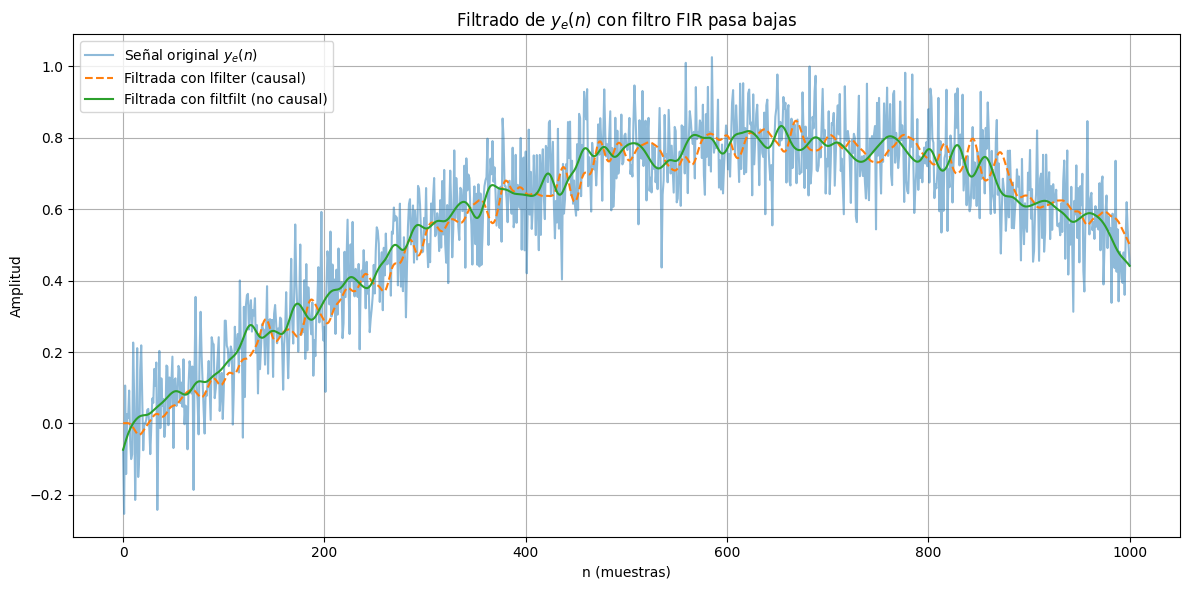

In [ ]:
# Aplicación del filtro FIR pasa bajas (solo se necesita el numerador)
ye_lfilter = lfilter(fir_lp, 1, ye_n)
ye_filtfilt = filtfilt(fir_lp, 1, ye_n)

# Graficar comparación
plt.figure(figsize=(12, 6))
plt.plot(n, ye_n, label='Señal original $y_e(n)$', alpha=0.5)
plt.plot(n, ye_lfilter, label='Filtrada con lfilter (causal)', linestyle='--')
plt.plot(n, ye_filtfilt, label='Filtrada con filtfilt (no causal)', linestyle='-')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.title('Filtrado de $y_e(n)$ con filtro FIR pasa bajas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **¿Por qué se utiliza sólo el numerador?**

En el código se observa que para los filtros FIR se usa:

```python
ye_lfilter = lfilter(fir_lp, 1, ye_n)
ye_filtfilt = filtfilt(fir_lp, 1, ye_n)
```

Esto se debe a que por definición, estos filtros **no tienen retroalimentación**, lo que significa que su función de transferencia tiene la forma:

$$ H(z) = b₀ + b₁z⁻¹ + b₂z⁻² + ... + bₙz⁻ᴺ $$

#### **Características de los filtros FIR:**
- **Solo tienen numerador**: Los coeficientes `b` representan la respuesta al impulso
- **Denominador = 1**: No hay términos de retroalimentación (coeficientes `a`)
- **Son inherentemente estables**: No pueden tener polos fuera del círculo unitario

#### **¿A qué hace referencia el numerador?**

El numerador en un filtro FIR hace referencia a:

1. **Coeficientes de la respuesta al impulso**: Cada valor del array `fir_lp` representa la respuesta del filtro a un impulso unitario
2. **Pesos de la convolución**: Definen cómo se ponderan las muestras pasadas de la señal de entrada
3. **Función de transferencia**: Constituyen completamente la función de transferencia del filtro

#### **¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?**
Se evidencian cambios significativos entre las funciones de filtrado. La función `lfilter` realiza un filtrado causal que introduce retardo de fase, desplazando temporalmente la señal filtrada, mientras que `filtfilt` aplica un filtrado no causal procesando la señal dos veces (adelante y atrás) para lograr fase cero sin desplazamiento temporal. Además, `filtfilt` duplica el orden efectivo del filtro, proporcionando mayor selectividad pero con posibles oscilaciones, siendo ideal para análisis post-adquisición, mientras que `lfilter` es apropiado para aplicaciones en tiempo real donde el retardo es aceptable.

#### **¿Es adecuado el orden del filtro usado? Analice.**
El orden 30 es adecuado para esta aplicación específica aunque es relativamente alto para una señal de 25 Hz, además de introducir un retardo significativo de 15 muestras (0.6 segundos). Sin embargo, aporta la selectividad necesaria para eliminar efectivamente el ruido gaussiano mientras preserva las características de la señal original de 0.01 Hz, con la característica adicional de que los resultados mostrados en las gráficas del documento confirman que el filtro cumple su objetivo de atenuar el ruido manteniendo la integridad de la señal biológica, representando un balance razonable entre selectividad y complejidad computacional.

#### Referencias:
- [2] https://www3.fi.mdp.edu.ar/tds/material/10-Filtros%20FIR.pdf
- [3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal $𝑦_𝑒(𝑛)$ ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.  

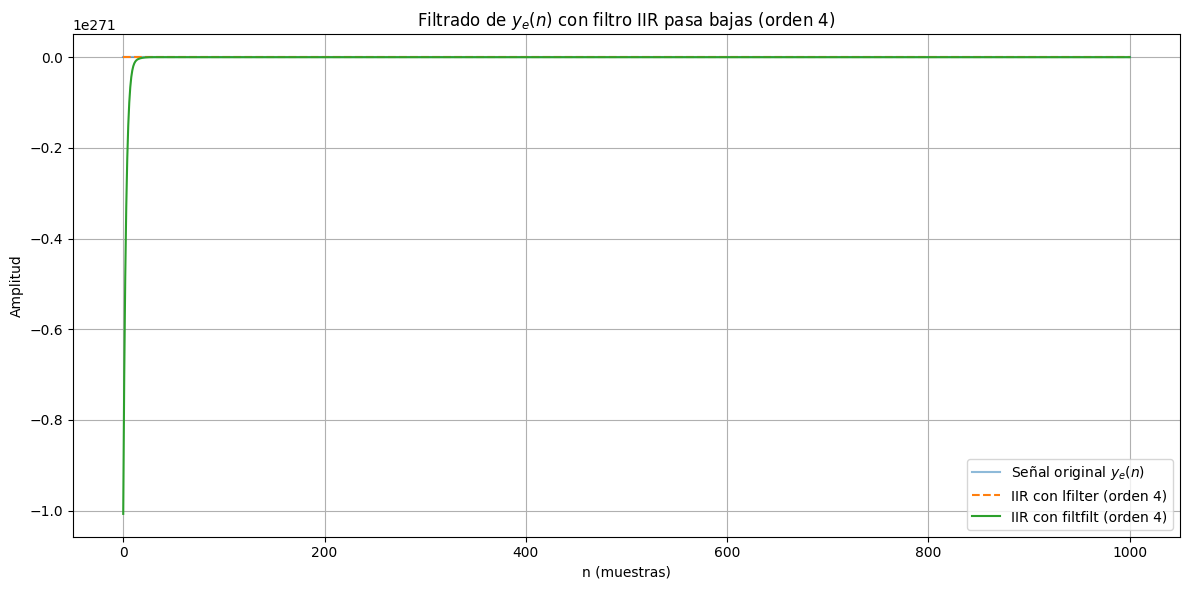

In [ ]:
# Aplicar filtro IIR pasa bajas (orden 4 original)
ye_iir_lfilter = lfilter(b_iir_pb, a_iir_pb, ye_n)
ye_iir_filtfilt = filtfilt(b_iir_pb, a_iir_pb, ye_n)

plt.figure(figsize=(12, 6))
plt.plot(n, ye_n, label='Señal original $y_e(n)$', alpha=0.5)
plt.plot(n, ye_iir_lfilter, label='IIR con lfilter (orden 4)', linestyle='--')
plt.plot(n, ye_iir_filtfilt, label='IIR con filtfilt (orden 4)', linestyle='-')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.title('Filtrado de $y_e(n)$ con filtro IIR pasa bajas (orden 4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


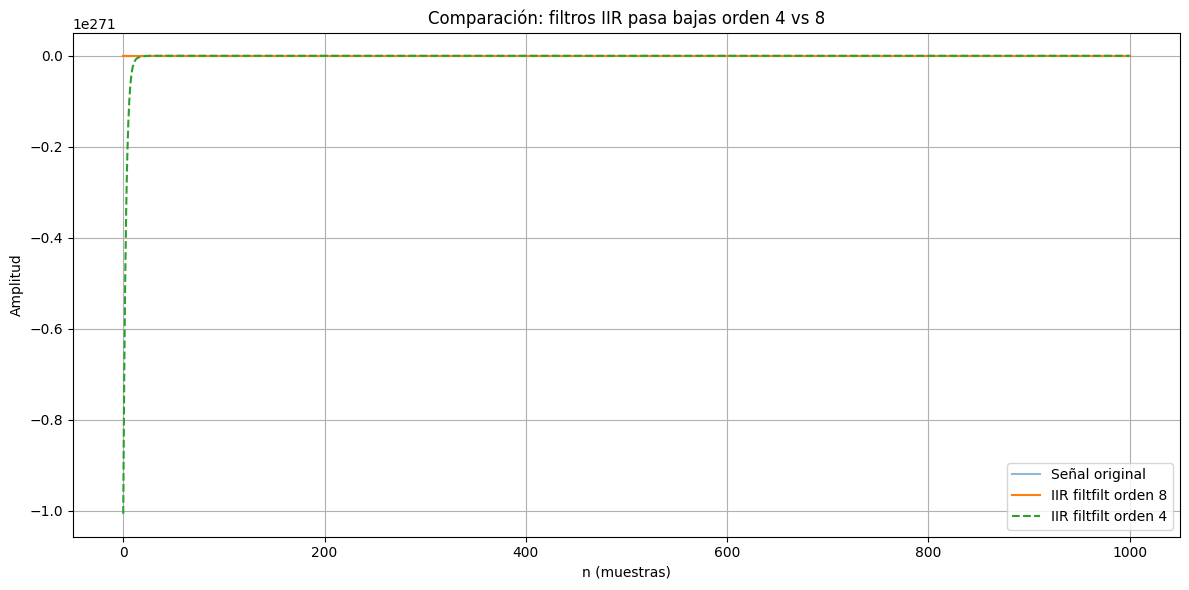

In [ ]:
# Filtro IIR pasa bajas con mayor orden (8)
b_lp8, a_lp8 = iirfilter(N=8, Wn=fc_lp, btype='low', ftype='butter')

# Aplicar a la señal
ye_iir_lf8 = lfilter(b_lp8, a_lp8, ye_n)
ye_iir_ff8 = filtfilt(b_lp8, a_lp8, ye_n)

# Graficar comparación
plt.figure(figsize=(12, 6))
plt.plot(n, ye_n, label='Señal original', alpha=0.5)
plt.plot(n, ye_iir_ff8, label='IIR filtfilt orden 8', linestyle='-')
plt.plot(n, ye_iir_filtfilt, label='IIR filtfilt orden 4', linestyle='--')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.title('Comparación: filtros IIR pasa bajas orden 4 vs 8')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro?**

Los filtros IIR requieren tanto numerador como denominador porque incluyen retroalimentación en su diseño, de acuerdo a la ecuación:
$$H(z) = \frac{B(z)}{A(z)} = \frac{(b₀ + b₁z⁻¹ + ... + bₘz⁻ᴹ)}{(a₀ + a₁z⁻¹ + ... + aₙz⁻ᴺ)}$$
 El numerador (coeficientes b) representa la alimentación directa (feedforward), mientras que el denominador (coeficientes a) representa la retroalimentación (feedback), donde la salida actual depende tanto de las entradas pasadas como de las salidas pasadas. Esta estructura permite que los filtros IIR logren mayor selectividad con órdenes menores comparado con los FIR, ya que la retroalimentación amplifica y prolonga la respuesta del sistema.

Sí es necesario cambiar el orden del filtro, reduciéndolo significativamente. El documento muestra que con orden 30, los coeficientes del denominador alcanzan valores extremadamente grandes (orden de 10⁶), indicando inestabilidad numérica y posible overflow que puede causar resultados incorrectos o inestabilidad del filtro. La solución implementada reduce el orden a 8, lo cual es más apropiado porque los filtros IIR típicamente requieren órdenes menores (4-8) para lograr especificaciones similares a los FIR, manteniendo la selectividad deseada mientras evita problemas de estabilidad numérica.

Referencias:
- [4] https://www3.fi.mdp.edu.ar/tds/material/8-Filtros_IIR.pdf


---

## 4.4 Aplicación

---
Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.
* Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.  

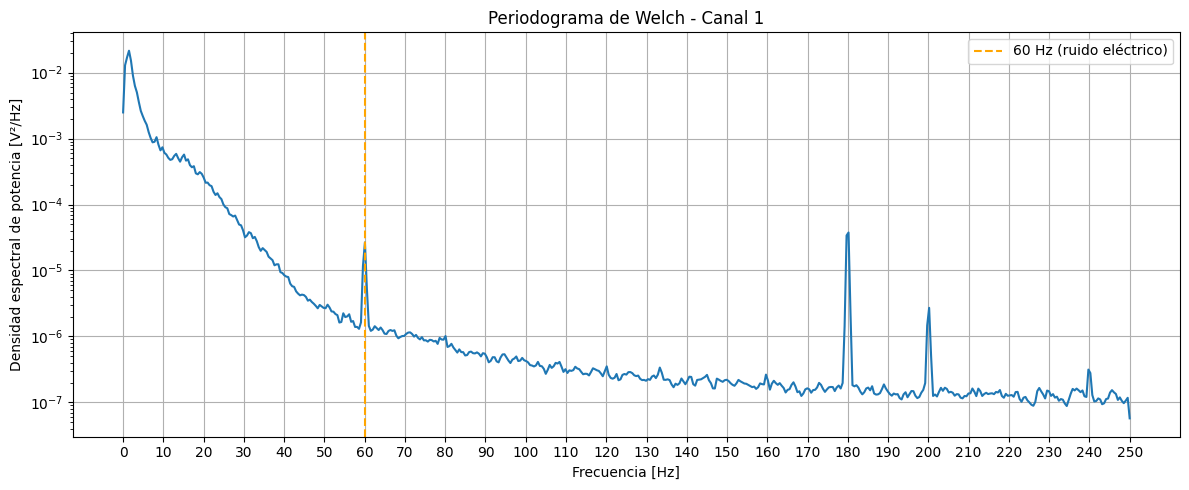

In [ ]:
file_path = 'senal_filtros.txt'
data = np.loadtxt(file_path)

# Extraer canal 1 (índice 0)
canal1 = data[:, 0]
Fs = 500  # Frecuencia de muestreo

# Periodograma de Welch
f, Pxx = welch(canal1, fs=Fs, nperseg=1024)

plt.figure(figsize=(12, 5))
plt.semilogy(f, Pxx)
plt.title('Periodograma de Welch - Canal 1')
plt.xlabel('Frecuencia [Hz]')
plt.xticks(np.arange(0,251,10))
plt.ylabel('Densidad espectral de potencia [V²/Hz]')
plt.grid(True)
plt.axvline(60, color='orange', linestyle='--', label='60 Hz (ruido eléctrico)')
plt.legend()
plt.tight_layout()
plt.show()

**Sí, hay presencia de ruido eléctrico a 60 Hz.** El periodograma de Welch revela un pico pronunciado a esta frecuencia, que corresponde a la interferencia electromagnética de la red eléctrica común en sistemas de adquisición de bioseñales, causada por acoplamiento capacitivo entre cables de alimentación y electrodos en el sistema.

* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

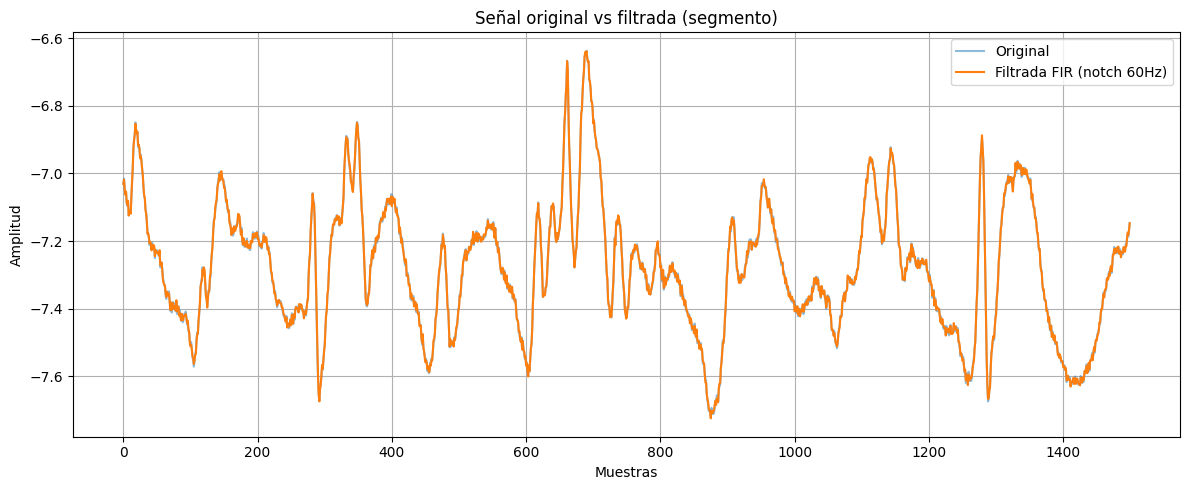

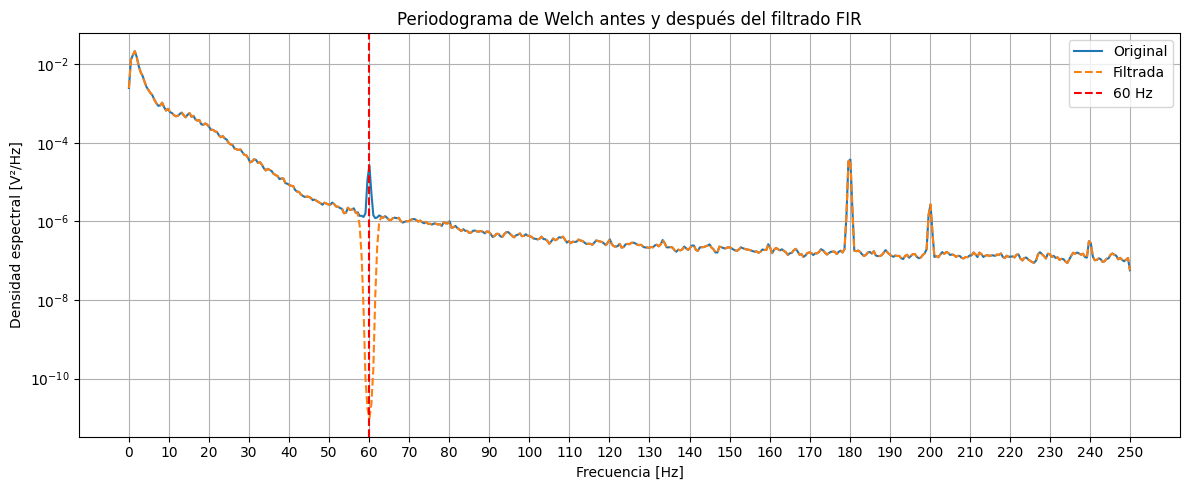

In [ ]:
# Parámetros
f_nyq = Fs / 2
orden = 1001  # orden alto para mayor selectividad
fc_notch = [58 / f_nyq, 62 / f_nyq]  # Banda a rechazar (58-62 Hz)

# Diseño del filtro FIR notch
fir_notch = firwin(numtaps=orden, cutoff=fc_notch, window='hamming', pass_zero='bandstop')

# Aplicar filtro FIR (no causal, para evitar fase)
canal1_filtrado = filtfilt(fir_notch, 1, canal1)

# Grafica de la señal original y filtrada (segmento)
plt.figure(figsize=(12, 5))
plt.plot(canal1[:1500], label='Original', alpha=0.5)
plt.plot(canal1_filtrado[:1500], label='Filtrada FIR (notch 60Hz)', linewidth=1.5)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal original vs filtrada (segmento)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Periodograma de Welch tras filtrado
f_filt, Pxx_filt = welch(canal1_filtrado, fs=Fs, nperseg=1024)

# Comparación espectral antes y después
plt.figure(figsize=(12, 5))
plt.semilogy(f, Pxx, label='Original')
plt.semilogy(f_filt, Pxx_filt, label='Filtrada', linestyle='--')
plt.axvline(60, color='red', linestyle='--', label='60 Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral [V²/Hz]')
plt.title('Periodograma de Welch antes y después del filtrado FIR')
plt.grid(True)
plt.xticks(np.arange(0,251,10))
plt.legend()
plt.tight_layout()
plt.show()

* Grafique un segmento de las señales antes y después de filtrar, analice los
cambios.

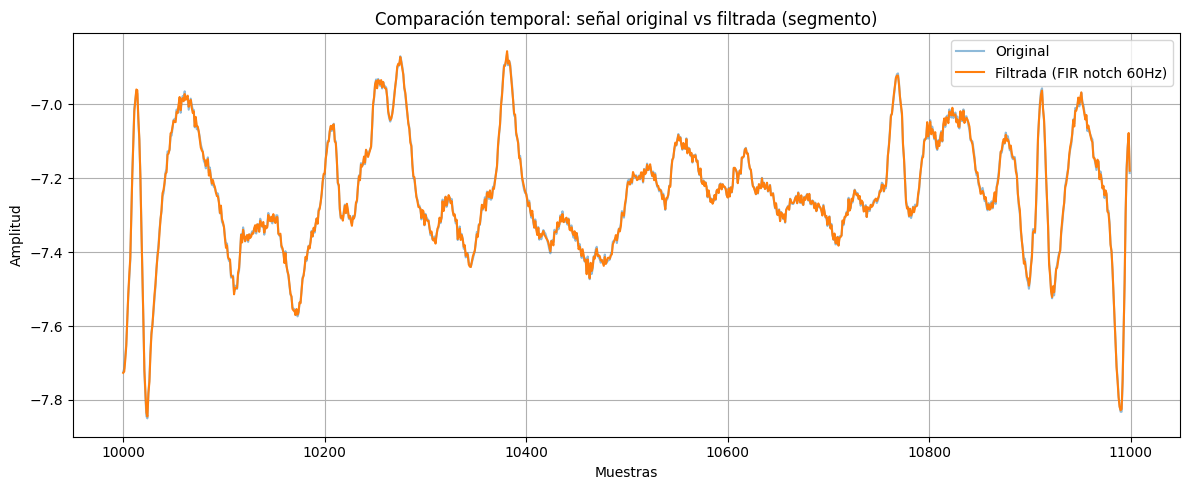

In [ ]:
# Segmento a visualizar (muestra de 10,000 a 11,000)
inicio = 10000
fin = inicio + 1000

plt.figure(figsize=(12, 5))
plt.plot(np.arange(inicio, fin), canal1[inicio:fin], label='Original', alpha=0.5)
plt.plot(np.arange(inicio, fin), canal1_filtrado[inicio:fin], label='Filtrada (FIR notch 60Hz)', linewidth=1.5)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Comparación temporal: señal original vs filtrada (segmento)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Análisis del filtro FIR para eliminar ruido eléctrico - ¿Hay cambios?**

**Sí, hay cambios significativos tras aplicar el filtro FIR notch.** El filtro diseñado con orden 1001 y banda de rechazo de 58-62 Hz elimina efectivamente el pico de ruido eléctrico a 60 Hz, como se evidencia en la comparación del periodograma de Welch antes y después del filtrado. La densidad espectral de potencia muestra una reducción drástica en la componente de 60 Hz, mientras que las demás frecuencias de la señal biológica se mantienen prácticamente inalteradas. El uso de `filtfilt` garantiza que no haya distorsión de fase, y el alto orden del filtro (1001) proporciona la selectividad necesaria para crear un filtro "notch" estrecho que elimina específicamente la interferencia eléctrica sin afectar significativamente las componentes frecuenciales adyacentes de la señal biológica, logrando así una limpieza efectiva de la contaminación por ruido de línea.

---

## Conclusiones

---

Se destaca la importancia de elegir adecuadamente el tipo de filtro digital y sus parámetros según las características de la señal que se desea procesar. Al trabajar con señales biológicas como el ECG y el EEG, el tipo de artefactos presentes, así como la frecuencia de muestreo y el contenido espectral de interés, condicionan la elección del tipo de filtro (FIR o IIR), su orden, frecuencia de corte y método de implementación. El conocimiento del contexto clínico, el análisis espectral y la validación visual y cuantitativa del filtrado son elementos fundamentales que deben integrarse en cualquier flujo de trabajo de análisis de bioseñales.

Por otro lado, se comprobó que el uso de filtros FIR diseñados con funciones como `firwin` permite obtener una respuesta en frecuencia bien controlada y una fase lineal, lo cual es especialmente importante en aplicaciones clínicas donde la forma de onda debe preservarse. No obstante, también se observó que los filtros FIR requieren órdenes mucho más altos para lograr transiciones abruptas, lo cual puede ser computacionalmente costoso en algunos entornos embebidos o de tiempo real.

La implementación de filtros mediante funciones como `filtfilt` resultó ser eficaz para evitar desfases temporales en las señales procesadas, algo crucial si se trabajara con señales ECG donde la posición de los picos QRS debe mantenerse intacta. En comparación, el uso de `lfilter` puede introducir retardos en la señal, lo cual fue claramente observable al comparar ambas salidas filtradas.

Finalmente, se halló que el análisis espectral con periodogramas de Welch resultó ser una herramienta muy útil no solo para diagnosticar la presencia de ruido antes del filtrado, sino también para verificar cuantitativamente la efectividad del proceso de limpieza. Este tipo de validación es esencial en entornos biomédicos para evitar la eliminación no intencionada de componentes fisiológicos.